# **Statistical Learning for Automation Systems**

       
## *Prof. Simone Formentin*

___

# Classification with Neural Networks - Case Study

Let's consider an example of classification problem solved by using Neural Networks.

## Dataset Description

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

## Import Data Analysis and Visualization Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Import Dataset

In [2]:
df = pd.read_csv('cancer_classification.csv')          # Import Dataset from .csv file

In [3]:
df.head()                                              # Show header

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## Exploratory Data Analysis

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

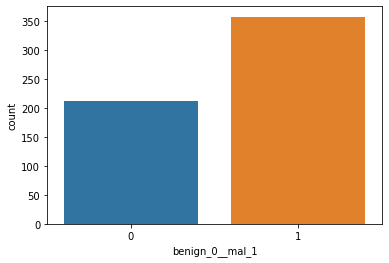

In [6]:
sns.countplot(x='benign_0__mal_1',data=df)                  # Show entries count for each class malignant/benign

<AxesSubplot:>

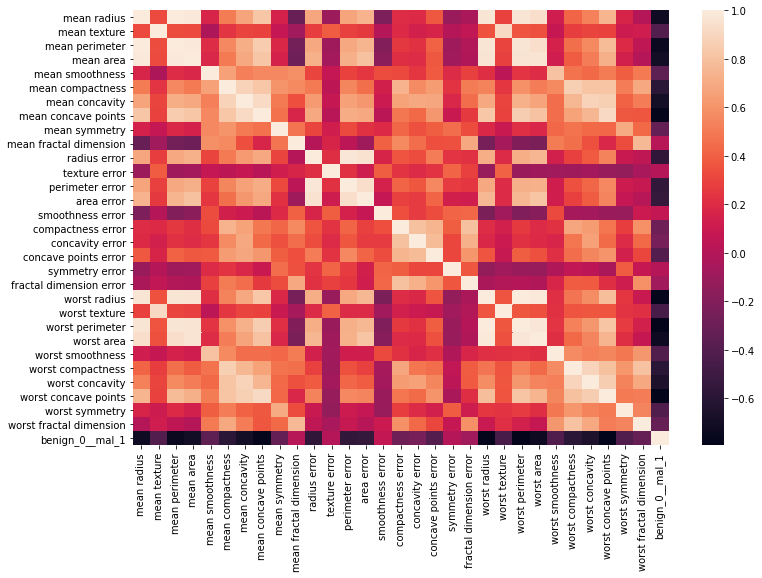

In [7]:
plt.figure(figsize=(12,8))                                  # Create a figure object with a specified figure size

sns.heatmap(df.corr())                                      # Plot Correlation Matrix as heatmap

In [8]:
df.corr()['benign_0__mal_1'].sort_values(ascending = False)                # Sort correlation coefficients computed between each feature and target variable (class)

benign_0__mal_1            1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

<AxesSubplot:>

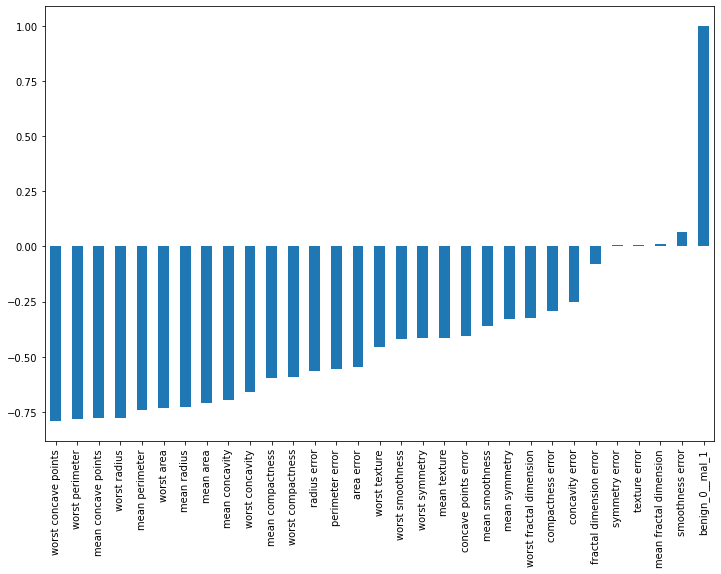

In [9]:
plt.figure(figsize=(12,8))                                        # Create a figure object with a specified figure size

df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')       # Barplot for the sorted correlation coefficients

<AxesSubplot:>

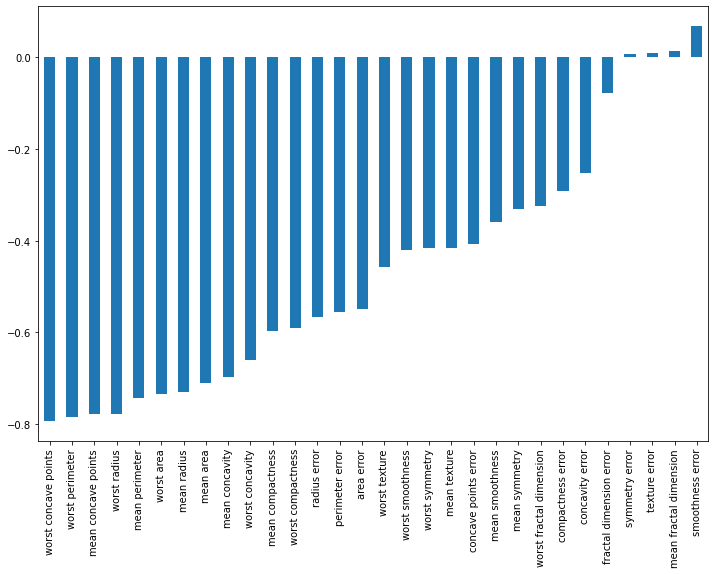

In [10]:
plt.figure(figsize=(12,8))                                              # Create a figure object with a specified figure size

df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')        # Barplot for the sorted correlation coefficients (excluding autocorrelation for target variable)

## Train/Test Set Split

In [11]:
from sklearn.model_selection import train_test_split            # Import train_test_split function from Scikit-Learn

In [12]:
# Convert columns of Pandas DataFrame to Numpy arrays

# Features
X = df.drop('benign_0__mal_1',axis=1).values

# Target Variable
y = df['benign_0__mal_1'].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)         # Train-Test Split

In [14]:
X_train.shape

(426, 30)

In [15]:
X_test.shape

(143, 30)

In [16]:
y_train.shape

(426,)

In [17]:
y_test.shape

(143,)

## Data Pre-Processing

Use StandardScaler() to perform input centering and input normalization.

Notice that it is sufficient to standardize just input features, while it is not necessary to standardize the target variable.

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()                # StandardScaler() object instantiation

Notice: to prevent data leakage from the test set, we only fit our scaler on the training set.

In [20]:
scaler.fit(X_train)                      # Fit Standard Scaler only on the training set

StandardScaler()

In [21]:
X_train = scaler.transform(X_train)          # Apply Standardization on X_train
X_test = scaler.transform(X_test)            # Apply Standardization on X_test

## Neural Network Definition - TensorFlow & Keras

## Creating NN Model

In [22]:
import tensorflow as tf

from tensorflow.keras.models import Sequential                         # Import Sequential() to instatiate a Feed-forward NN object
from tensorflow.keras.layers import Dense                              # Import Dense() to instatiate fully-connected layer objects

In [23]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))

# Final output node for prediction
model.add(Dense(units=1,activation='sigmoid'))                          # In the output layer we just have one neuron since the target is a single variable (class)
 
# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')             # Optimizer determines the way in which you approach gradient descent (alternative: ADAM)

## Training the Model 

### Example One: Choosing too many epochs and overfitting!

In [24]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), verbose=1)

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 903us/sample - loss: 0.6568 - val_loss: 0.5805
Epoch 2/600
426/426 [==============================] - 0s 94us/sample - loss: 0.5016 - val_loss: 0.4535
Epoch 3/600
426/426 [==============================] - 0s 65us/sample - loss: 0.3913 - val_loss: 0.3545
Epoch 4/600
426/426 [==============================] - 0s 58us/sample - loss: 0.3056 - val_loss: 0.2801
Epoch 5/600
426/426 [==============================] - 0s 64us/sample - loss: 0.2431 - val_loss: 0.2266
Epoch 6/600
426/426 [==============================] - 0s 56us/sample - loss: 0.1970 - val_loss: 0.1889
Epoch 7/600
426/426 [==============================] - 0s 63us/sample - loss: 0.1650 - val_loss: 0.1618
Epoch 8/600
426/426 [==============================] - 0s 73us/sample - loss: 0.1421 - val_loss: 0.1431
Epoch 9/600
426/426 [==============================] - 0s 59us/sample - loss: 0.1257 - val_loss: 0.1287
Epoch 10/600
426/

426/426 [==============================] - 0s 55us/sample - loss: 0.0013 - val_loss: 0.0664
Epoch 156/600
426/426 [==============================] - 0s 58us/sample - loss: 0.0013 - val_loss: 0.0668
Epoch 157/600
426/426 [==============================] - 0s 60us/sample - loss: 0.0013 - val_loss: 0.0665
Epoch 158/600
426/426 [==============================] - 0s 58us/sample - loss: 0.0013 - val_loss: 0.0666
Epoch 159/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0013 - val_loss: 0.0664
Epoch 160/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0012 - val_loss: 0.0660
Epoch 161/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0012 - val_loss: 0.0665
Epoch 162/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0012 - val_loss: 0.0668
Epoch 163/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0012 - val_loss: 0.0670
Epoch 164/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 56us/sample - loss: 1.2013e-04 - val_loss: 0.0976
Epoch 305/600
426/426 [==============================] - 0s 59us/sample - loss: 1.1504e-04 - val_loss: 0.0974
Epoch 306/600
426/426 [==============================] - 0s 56us/sample - loss: 1.1242e-04 - val_loss: 0.0974
Epoch 307/600
426/426 [==============================] - 0s 61us/sample - loss: 1.1000e-04 - val_loss: 0.0978
Epoch 308/600
426/426 [==============================] - 0s 57us/sample - loss: 1.0762e-04 - val_loss: 0.0979
Epoch 309/600
426/426 [==============================] - 0s 60us/sample - loss: 1.0639e-04 - val_loss: 0.0982
Epoch 310/600
426/426 [==============================] - 0s 58us/sample - loss: 1.0431e-04 - val_loss: 0.0982
Epoch 311/600
426/426 [==============================] - 0s 60us/sample - loss: 1.0173e-04 - val_loss: 0.0980
Epoch 312/600
426/426 [==============================] - 0s 57us/sample - loss: 9.8645e-05 - val_loss: 0.0984
Epoch 313/600
426/426 [=

426/426 [==============================] - 0s 55us/sample - loss: 9.3882e-06 - val_loss: 0.1498
Epoch 453/600
426/426 [==============================] - 0s 62us/sample - loss: 9.3103e-06 - val_loss: 0.1500
Epoch 454/600
426/426 [==============================] - 0s 58us/sample - loss: 9.2058e-06 - val_loss: 0.1504
Epoch 455/600
426/426 [==============================] - 0s 57us/sample - loss: 9.0966e-06 - val_loss: 0.1503
Epoch 456/600
426/426 [==============================] - 0s 62us/sample - loss: 9.0423e-06 - val_loss: 0.1507
Epoch 457/600
426/426 [==============================] - 0s 56us/sample - loss: 8.9268e-06 - val_loss: 0.1508
Epoch 458/600
426/426 [==============================] - 0s 63us/sample - loss: 8.8723e-06 - val_loss: 0.1511
Epoch 459/600
426/426 [==============================] - 0s 62us/sample - loss: 8.7115e-06 - val_loss: 0.1515
Epoch 460/600
426/426 [==============================] - 0s 59us/sample - loss: 8.7832e-06 - val_loss: 0.1517
Epoch 461/600
426/426 [=

426/426 [==============================] - 0s 59us/sample - loss: 2.2293e-06 - val_loss: 0.1821


In [25]:
model_loss = pd.DataFrame(model.history.history)    # Save Training and Validation Loss in a Pandas DataFrame

In [26]:
model_loss.head()                                   # Show header (loss = Training Loss, val_loss = Validation Loss)

,loss,val_loss
0,0.656790,0.580476
1,0.501619,0.453472
2,0.391343,0.354454
3,0.305625,0.280072
4,0.243148,0.226576


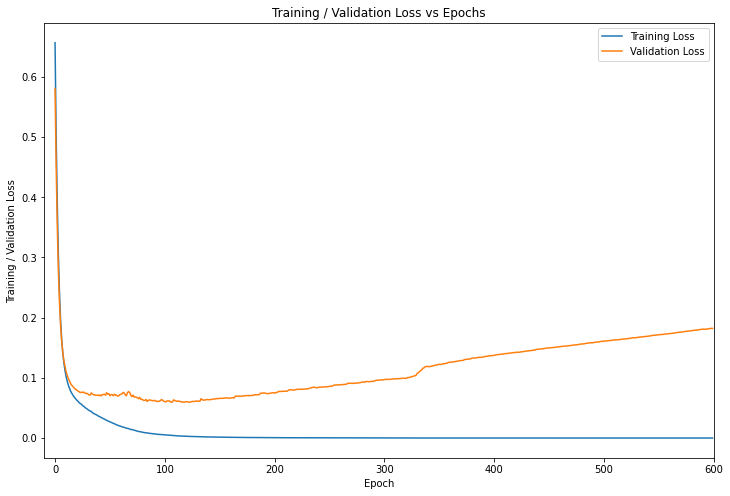

In [27]:
# Plot Training / Validation Loss vs Epochs

plt.figure(figsize = (12,8))

plt.plot(range(len(model_loss)), model_loss['loss'], label = 'Training Loss')
plt.plot(range(len(model_loss)), model_loss['val_loss'], label = 'Validation Loss')

plt.xlim([-10, len(model_loss)])
plt.xlabel('Epoch')
plt.ylabel('Training / Validation Loss')
plt.title('Training / Validation Loss vs Epochs')
plt.legend()

## Example Two: Early Stopping

We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

In [28]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [29]:
from tensorflow.keras.callbacks import EarlyStopping                 # Import EarlyStopping method

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [30]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)       # Define EarlyStopping object and assign it to variable "early_stop"

In [31]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])     # Fit NN model, including early stopping 

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 1ms/sample - loss: 0.6227 - val_loss: 0.5185
Epoch 2/600
426/426 [==============================] - 0s 95us/sample - loss: 0.4605 - val_loss: 0.3882
Epoch 3/600
426/426 [==============================] - 0s 62us/sample - loss: 0.3484 - val_loss: 0.2989
Epoch 4/600
426/426 [==============================] - 0s 61us/sample - loss: 0.2694 - val_loss: 0.2397
Epoch 5/600
426/426 [==============================] - 0s 70us/sample - loss: 0.2152 - val_loss: 0.1983
Epoch 6/600
426/426 [==============================] - 0s 70us/sample - loss: 0.1768 - val_loss: 0.1670
Epoch 7/600
426/426 [==============================] - 0s 59us/sample - loss: 0.1499 - val_loss: 0.1444
Epoch 8/600
426/426 [==============================] - 0s 59us/sample - loss: 0.1302 - val_loss: 0.1273
Epoch 9/600
426/426 [==============================] - 0s 67us/sample - loss: 0.1162 - val_loss: 0.1146
Epoch 10/600
426/42

426/426 [==============================] - 0s 59us/sample - loss: 0.0015 - val_loss: 0.0246
Epoch 156/600
426/426 [==============================] - 0s 60us/sample - loss: 0.0014 - val_loss: 0.0241
Epoch 157/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0015 - val_loss: 0.0239
Epoch 158/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0013 - val_loss: 0.0244
Epoch 159/600
426/426 [==============================] - 0s 60us/sample - loss: 0.0015 - val_loss: 0.0256
Epoch 160/600
426/426 [==============================] - 0s 65us/sample - loss: 0.0013 - val_loss: 0.0246
Epoch 161/600
426/426 [==============================] - 0s 62us/sample - loss: 0.0014 - val_loss: 0.0241
Epoch 162/600
426/426 [==============================] - 0s 85us/sample - loss: 0.0012 - val_loss: 0.0242
Epoch 163/600
426/426 [==============================] - 0s 79us/sample - loss: 0.0013 - val_loss: 0.0243
Epoch 164/600
426/426 [==============================] - 0s 

In [32]:
model_loss = pd.DataFrame(model.history.history)           # Save Training and Validation Loss in a Pandas DataFrame 

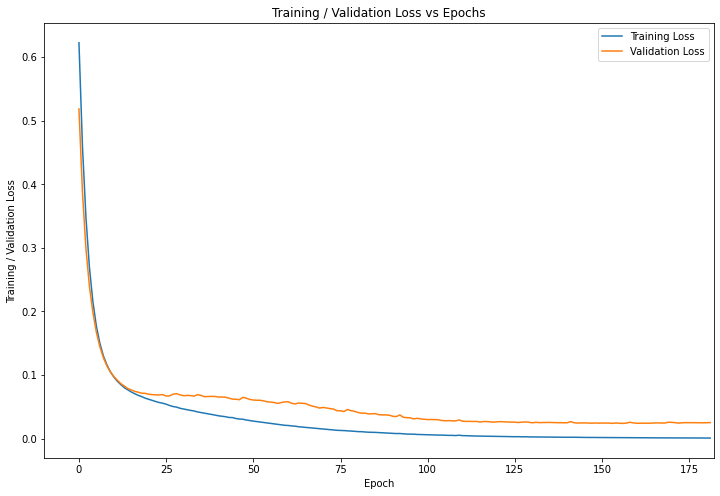

In [33]:
# Plot Training / Validation Loss vs Epochs

plt.figure(figsize = (12,8))

plt.plot(range(len(model_loss)), model_loss['loss'], label = 'Training Loss')
plt.plot(range(len(model_loss)), model_loss['val_loss'], label = 'Validation Loss')

plt.xlim([-10, len(model_loss)])
plt.xlabel('Epoch')
plt.ylabel('Training / Validation Loss')
plt.title('Training / Validation Loss vs Epochs')
plt.legend()

## Example Three: Adding in DropOut Layers

In [34]:
from tensorflow.keras.layers import Dropout                       # Import Dropout method

In [35]:
help(Dropout)

Help on class Dropout in module tensorflow.python.keras.layers.core:

class Dropout(tensorflow.python.keras.engine.base_layer.Layer)
 |  Dropout(rate, noise_shape=None, seed=None, **kwargs)
 |  
 |  Applies Dropout to the input.
 |  
 |  Dropout consists in randomly setting
 |  a fraction `rate` of input units to 0 at each update during training time,
 |  which helps prevent overfitting.
 |  
 |  Arguments:
 |    rate: Float between 0 and 1. Fraction of the input units to drop.
 |    noise_shape: 1D integer tensor representing the shape of the
 |      binary dropout mask that will be multiplied with the input.
 |      For instance, if your inputs have shape
 |      `(batch_size, timesteps, features)` and
 |      you want the dropout mask to be the same for all timesteps,
 |      you can use `noise_shape=(batch_size, 1, features)`.
 |    seed: A Python integer to use as random seed.
 |  
 |  Call arguments:
 |    inputs: Input tensor (of any rank).
 |    training: Python boolean indicat

In [36]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))                                    # Add Dropout option to NN layers

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))                                    # Add Dropout option to NN layers
  
model.add(Dense(units=1,activation='sigmoid'))
          
model.compile(loss='binary_crossentropy', optimizer='adam')

In [37]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 1ms/sample - loss: 0.6820 - val_loss: 0.5074
Epoch 2/600
426/426 [==============================] - 0s 65us/sample - loss: 0.5963 - val_loss: 0.3985
Epoch 3/600
426/426 [==============================] - 0s 78us/sample - loss: 0.5271 - val_loss: 0.3324
Epoch 4/600
426/426 [==============================] - 0s 76us/sample - loss: 0.4728 - val_loss: 0.2837
Epoch 5/600
426/426 [==============================] - 0s 75us/sample - loss: 0.3861 - val_loss: 0.2433
Epoch 6/600
426/426 [==============================] - 0s 70us/sample - loss: 0.3642 - val_loss: 0.2138
Epoch 7/600
426/426 [==============================] - 0s 80us/sample - loss: 0.3038 - val_loss: 0.1910
Epoch 8/600
426/426 [==============================] - 0s 87us/sample - loss: 0.3197 - val_loss: 0.1714
Epoch 9/600
426/426 [==============================] - 0s 86us/sample - loss: 0.2627 - val_loss: 0.1552
Epoch 10/600
426/42

In [38]:
model_loss = pd.DataFrame(model.history.history)    # Save Training and Validation Loss in a Pandas DataFramemodel_loss.plot()

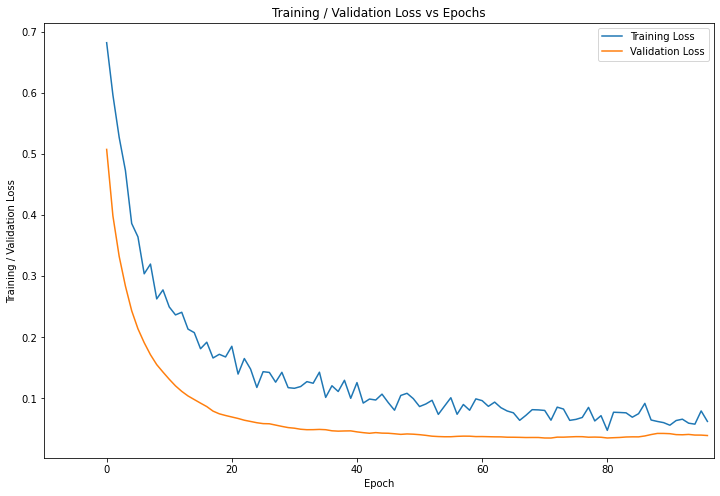

In [39]:
# Plot Training / Validation Loss vs Epochs

plt.figure(figsize = (12,8))

plt.plot(range(len(model_loss)), model_loss['loss'], label = 'Training Loss')
plt.plot(range(len(model_loss)), model_loss['val_loss'], label = 'Validation Loss')

plt.xlim([-10, len(model_loss)])
plt.xlabel('Epoch')
plt.ylabel('Training / Validation Loss')
plt.title('Training / Validation Loss vs Epochs')
plt.legend()

# Model Evaluation

In [40]:
predictions = model.predict_classes(X_test)               # Create an array containing NN model predictions on the Test Set    

In [41]:
from sklearn.metrics import classification_report, confusion_matrix             # Import model evaluation Metrics

In [42]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [43]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
